<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/bdm/Truth_Archive/case_study1/Assignment_EDA_Truth_Archive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population Table: Administrative Districts
This project is regarding the exploratory data analysis (EDA) on the administrative population of Malaysia.
The dataset *population_district.csv* contains the information of the population obtained from [OpenDosm](https://open.dosm.gov.my/data-catalogue/population_population_district_0). It contains data regarding the date, state, district, gender, ethnicity, age, and population of Malaysia from 2020 to 2023. This project used pandas, matplotlib, and seaborn to process, clean, analyze, and visualize the dataset.

## Downloading the Dataset

**TODO** -
1. Download the population district dataset from Department of Statistics Malaysia
2. Import Necessary libraries
3. Copy the URL of the dataset and load the dataset on Google Colab

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/bdm/Truth_Archive/population_district.csv'

The dataset has been downloaded and extracted.

### Done downloading the data. Now we prepapre and clean the data

## Data Preparation and Cleaning

**TODO**
1. We explored the number of rows & columns, range of values
2. We handle missing, incorrect and invalid data
3. We added a new column names 'Age Group'




Load the dataset into a data frame using Pandas

In [ ]:
df = pd.read_csv(url)

Explore the number of rows & columns

In [ ]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print(df.columns)

Number of rows: 255360
Number of columns: 7
Index(['date', 'state', 'district', 'sex', 'ethnicity', 'age', 'population'], dtype='object')


In [ ]:
#range
ranges = df.describe()
print(ranges)

          population
count  255360.000000
mean        4.104746
std        28.541400
min         0.000000
25%         0.000000
50%         0.200000
75%         1.500000
max      2334.200000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255360 entries, 0 to 255359
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        255360 non-null  object 
 1   state       255360 non-null  object 
 2   district    255360 non-null  object 
 3   sex         255360 non-null  object 
 4   ethnicity   255360 non-null  object 
 5   age         255360 non-null  object 
 6   population  255360 non-null  float64
dtypes: float64(1), object(6)
memory usage: 13.6+ MB
None


Checking if there is any missing values

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 date          0
state         0
district      0
sex           0
ethnicity     0
age           0
population    0
dtype: int64


Changing the Date column from object to date

In [ ]:
df['date'] = pd.to_datetime(df['date'])

Adding a column Age Group to the dataset

In [ ]:
df['age_group'] = df['age'].apply(lambda x: 'Child' if x in ['0-4', '5-9', '10-14']
                                   else 'Young Adult' if x in ['15-19', '20-24', '25-29', '30-34']
                                   else 'Adult' if x in ['35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
                                   else 'Senior' if x in ['65-69', '70-74', '75-79', '80-84', '85+']
                                   else 'overall_age' if x in ['overall_age']
                                   else 'Unknown')
df

,date,state,district,sex,ethnicity,age,population,age_group
0,2020-01-01,Johor,Batu Pahat,overall_sex,overall_ethnicity,overall_age,495.3,overall_age
1,2020-01-01,Johor,Batu Pahat,overall_sex,overall_ethnicity,0-4,30.3,Child
2,2020-01-01,Johor,Batu Pahat,overall_sex,overall_ethnicity,5-9,35.6,Child
3,2020-01-01,Johor,Batu Pahat,overall_sex,overall_ethnicity,10-14,40.0,Child
4,2020-01-01,Johor,Batu Pahat,overall_sex,overall_ethnicity,15-19,45.0,Young Adult
...,...,...,...,...,...,...,...,...
255355,2023-01-01,W.P. Putrajaya,W.P. Putrajaya,female,other_noncitizen,65-69,0.0,Senior
255356,2023-01-01,W.P. Putrajaya,W.P. Putrajaya,female,other_noncitizen,70-74,0.0,Senior
255357,2023-01-01,W.P. Putrajaya,W.P. Putrajaya,female,other_noncitizen,75-79,0.0,Senior
255358,2023-01-01,W.P. Putrajaya,W.P. Putrajaya,female,other_noncitizen,80-84,0.0,Senior


removing the overall from the columns

In [ ]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print(df.columns)

Number of rows: 255360
Number of columns: 8
Index(['date', 'state', 'district', 'sex', 'ethnicity', 'age', 'population',
       'age_group'],
      dtype='object')


In [ ]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('overall', case=False)).any(axis=1)]

In [ ]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print(df.columns)

Number of rows: 138240
Number of columns: 8
Index(['date', 'state', 'district', 'sex', 'ethnicity', 'age', 'population',
       'age_group'],
      dtype='object')


Checking if there is any missing values after adding age_group

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 date          0
state         0
district      0
sex           0
ethnicity     0
age           0
population    0
age_group     0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138240 entries, 8912 to 255359
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        138240 non-null  datetime64[ns]
 1   state       138240 non-null  object        
 2   district    138240 non-null  object        
 3   sex         138240 non-null  object        
 4   ethnicity   138240 non-null  object        
 5   age         138240 non-null  object        
 6   population  138240 non-null  float64       
 7   age_group   138240 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 9.5+ MB
None


## Exploratory Analysis and Visualization

**TODO**
1. We compute the mean, sum, range and other interesting statistics for numeric columns using the 'df.describe'
2. Import Matplotlib and seaborn to explore the distributions of numeric columns using histograms.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Compute the mean, sum, and other interesting statistics for numeric columns

In [ ]:
mean_values = df.mean()
sum_values = df.sum()
min_values = df.min()
max_values = df.max()

# Median, variance, standard deviation
median_values = df.median()
variance_values = df.var()
std_deviation = df.std()

# Outputting the computed statistics
print("\nMean:")
print(mean_values)
print("\nSum:")
print(sum_values)
print("\nMinimum Values:")
print(min_values)
print("\nMaximum Values:")
print(max_values)
print("\nMedian:")
print(median_values)
print("\nVariance:")
print(variance_values)
print("\nStandard Deviation:")
print(std_deviation)


<ipython-input-159-1e680e6ec4d6>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()
<ipython-input-159-1e680e6ec4d6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
<ipython-input-159-1e680e6ec4d6>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_values = df.sum()
<ipython-input-159-1e680e6ec4d6>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will includ


Mean:
population    0.945026
dtype: float64

Sum:
state         JohorJohorJohorJohorJohorJohorJohorJohorJohorJ...
district      Batu PahatBatu PahatBatu PahatBatu PahatBatu P...
sex           malemalemalemalemalemalemalemalemalemalemalema...
ethnicity     bumi_malaybumi_malaybumi_malaybumi_malaybumi_m...
age           0-45-910-1415-1920-2425-2930-3435-3940-4445-49...
population                                             130640.4
age_group     ChildChildChildYoung AdultYoung AdultYoung Adu...
dtype: object

Minimum Values:
date          2020-01-01 00:00:00
state                       Johor
district               Alor Gajah
sex                        female
ethnicity              bumi_malay
age                           0-4
population                    0.0
age_group                   Adult
dtype: object

Maximum Values:
date          2023-01-01 00:00:00
state              W.P. Putrajaya
district                      Yan
sex                          male
ethnicity        other_noncitiz

<ipython-input-159-1e680e6ec4d6>:8: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_values = df.var()
<ipython-input-159-1e680e6ec4d6>:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_deviation = df.std()


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

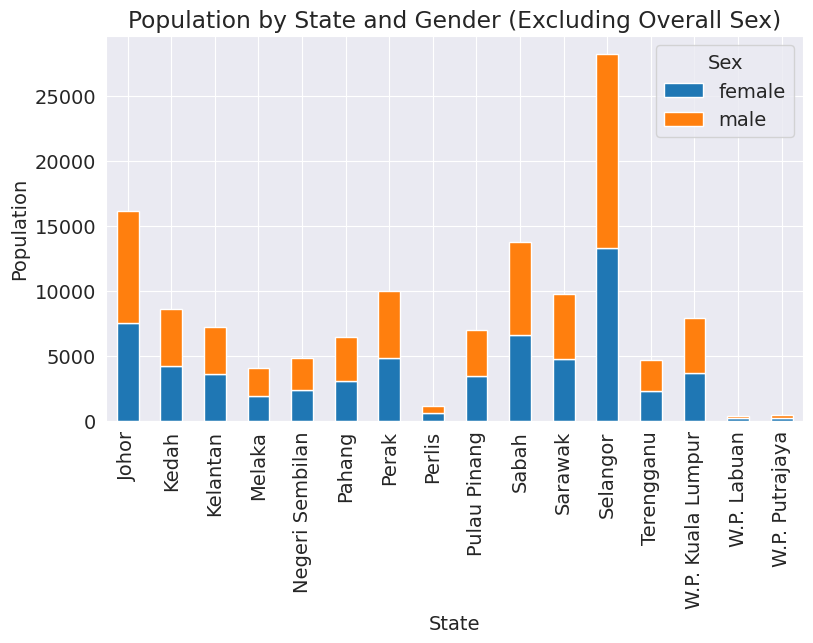

In [ ]:
population_by_state_sex = df.groupby(['state', 'sex'])['population'].sum().unstack()

population_by_state_sex.plot(kind='bar', stacked=True)
plt.title('Population by State and Gender (Excluding Overall Sex)')
plt.xlabel('State')
plt.ylabel('Population')
plt.legend(title='Sex')

plt.show()

# Analysis on the bar chart

1. The state of "Selangor" has the highest population, with a notably higher male population compared to the female population.

2. The state with the second-highest population is "Johor", which also has a higher male population.

3. "W.P. Kuala Lumpur" and "W.P. Putrajaya" have very small populations in comparison to other states, with "W.P. Putrajaya" having the smallest population.

4. In most states, the male population is higher than the female population.

5. The states of "Melaka" and "Negeri Sembilan" have a more balanced population between male and female compared to other states.

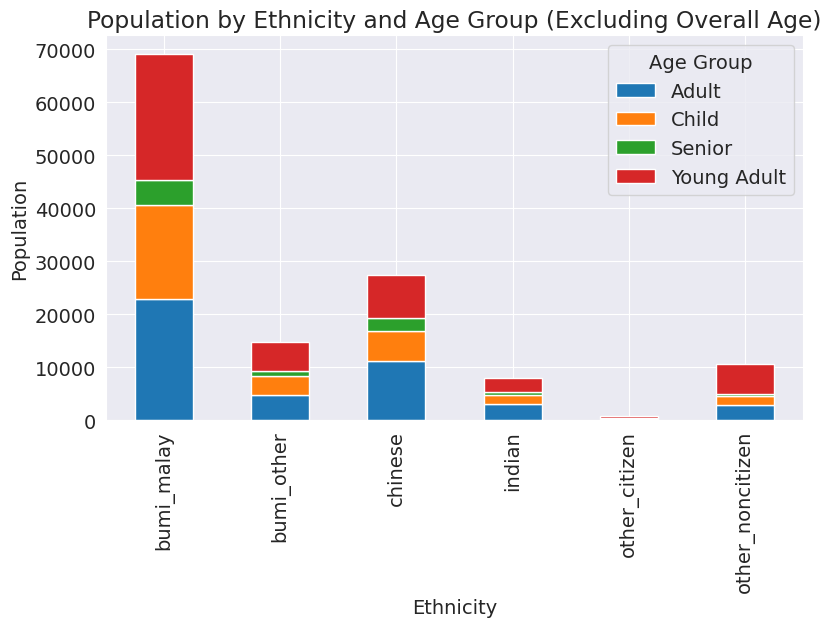

In [ ]:
population_by_ethnicity_age = df.groupby(['ethnicity', 'age_group'])['population'].sum().unstack()

population_by_ethnicity_age.plot(kind='bar', stacked=True)
plt.title('Population by Ethnicity and Age Group (Excluding Overall Age)')
plt.xlabel('Ethnicity')
plt.ylabel('Population')
plt.legend(title='Age Group')

plt.show()

# Analysis on the bar chart
1. The "bumi_malay" group has the largest population with a significant portion of adults, followed by young adults, children, and seniors.

2. The "chinese" group is the second largest, with a similar age distribution to the "bumi_malay", but with fewer children and young adults compared to adults and seniors.

3. The "indian" group has a smaller population, with relatively more adults and young adults compared to children and seniors.

4. The "bumi_other" group has a much smaller population compared to "bumi_malay" and "chinese", with more young adults and adults than children and seniors.

5. The "other_citizen" and "other_noncitizen" groups have the smallest populations, with the "other_noncitizen" group having the least, almost negligible in comparison.

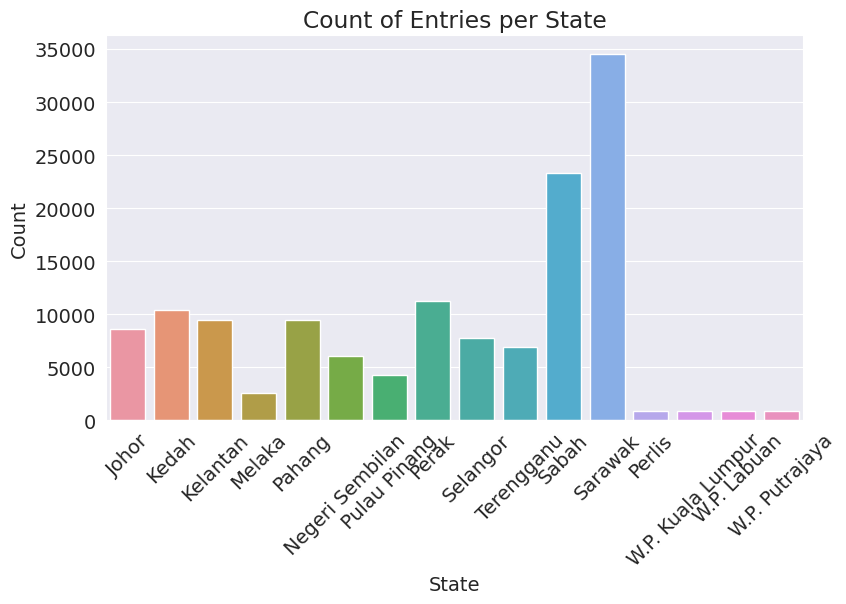

In [ ]:
plt.figure()
sns.countplot(data=df, x='state')
plt.title('Count of Entries per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze

1. The state with the highest number of entries is "Sarawak" with a count that appears to be around 35,000 entries.

2. The state with the second-highest number of entries is "Sabah" with a count close to 25,000 entries.

3. The states with the lowest counts, seemingly below 1,000 entries, are "Perlils," "W.P. Labuan," "W.P Kuala Pumpur" and "WP Putrajaya."

4. The rest of the states have counts ranging between approximately 2,000 to 10,000 entries, with "Perak" and "Kedah" being on the higher end of this range, and "Melaka" and "Pulau Pinang" being on the lower end.

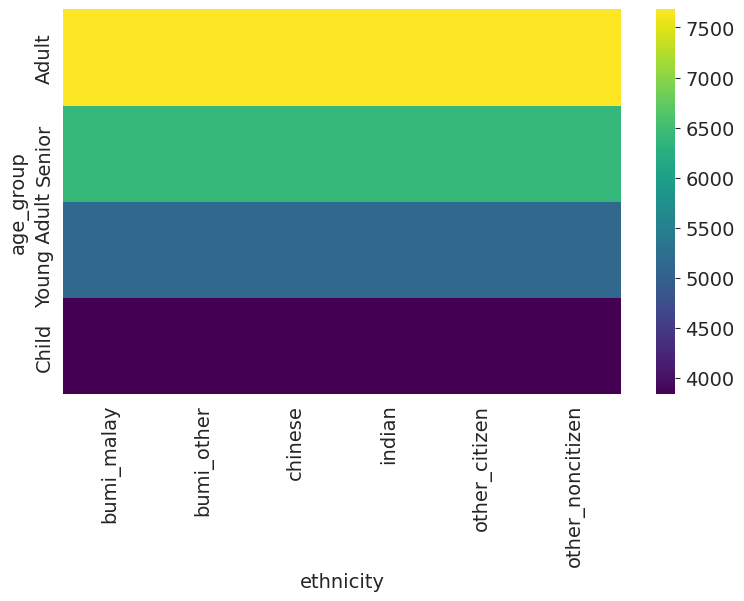

In [ ]:
plt.subplots()
df_2dhist = pd.DataFrame({
    x_label: grp['age_group'].value_counts()
    for x_label, grp in df.groupby('ethnicity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ethnicity')
_ = plt.ylabel('age_group')

## Analysis on the stacked bar chart

1. The "Adult" category is the largest segment across all ethnic groups.
2. "bumi_malay" has the highest total quantity, exceeding 7,500, with "Adult" being the most significant portion.
3. "other_noncitizen" has the lowest total quantity, around 4,000, with again 4."Adult" being the largest segment.
4. The distribution pattern is consistent across all groups, with "Adult" being the largest, followed by "Young Adult", and "Child" being the smallest segment.

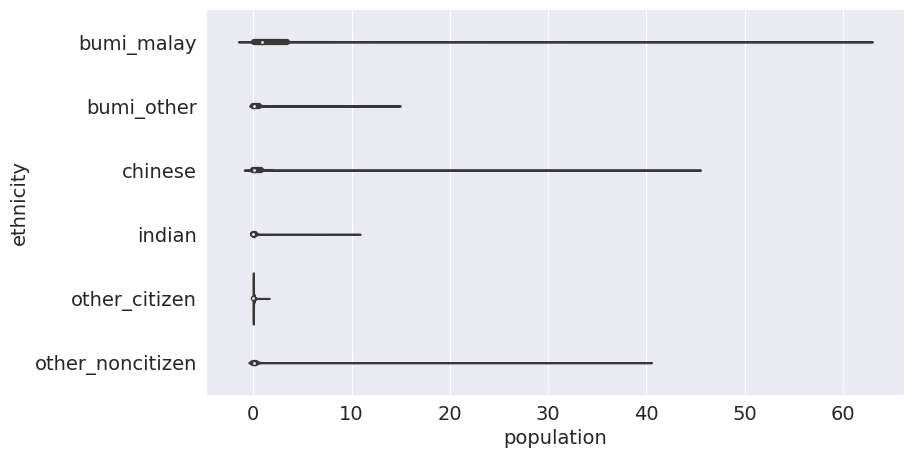

In [ ]:
plt.figure()
sns.violinplot(df, x='population', y='ethnicity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Analysis on the horinzon violin plot about the population distribution across different ethnic groups.

1. "Bumi_malay" appears to be the largest group, with a population just over 50 units.
2. The "chinese" category is the next largest, with a population of around 20 units.
3. The "indian" category follows, with a population just below 20 units.
4. "Bumi_other" and "other_citizen" have smaller populations, both under 10 units.
5. "Other_noncitizen" has the smallest population, around 5 units or fewer.

## Asking and Answering Questions



in this section we used matplot, seaborn and pandas to visulaize the data.
1. **Pandas**:
    - **Purpose**: Data manipulation and analysis library.
    - **Usage**: Manipulating datasets, performing filtering, grouping, statistical calculations, and handling structured data using DataFrames.

2. **Matplotlib**:
    - **Purpose**: Comprehensive plotting library for creating static, interactive, and animated visualizations.
    - **Usage**: Generating a wide range of plot types (line plots, bar plots, etc.) to visualize data processed or summarized with Pandas.

3. **Seaborn**:
    - **Purpose**: Statistical data visualization library built on Matplotlib.
    - **Usage**: Creating advanced and aesthetically pleasing statistical plots (e.g., KDE plots) or enhancing plot aesthetics, styles, and colors.

In essence, Pandas is used for data handling and manipulation, Matplotlib is used for creating basic visualizations, and Seaborn is employed for creating more complex statistical visualizations and improving the aesthetics of plots.


#### Q1: What is the population growth rate in the 'Batu Pahat' district of Johor over a specific time period?

In [ ]:
batu_pahat_data = df[(df['state'] == 'Johor') & (df['district'] == 'Batu Pahat')]

batu_pahat_data = batu_pahat_data.sort_values(by='date')

batu_pahat_data['population_change'] = batu_pahat_data['population'].diff() / batu_pahat_data['population'].shift(1)

print(batu_pahat_data)


             date  state    district     sex         ethnicity    age  \
8912   2020-01-01  Johor  Batu Pahat    male        bumi_malay    0-4   
35618  2020-01-01  Johor  Batu Pahat  female            indian  55-59   
35619  2020-01-01  Johor  Batu Pahat  female            indian  60-64   
35620  2020-01-01  Johor  Batu Pahat  female            indian  65-69   
35621  2020-01-01  Johor  Batu Pahat  female            indian  70-74   
...           ...    ...         ...     ...               ...    ...   
218219 2023-01-01  Johor  Batu Pahat    male           chinese  15-19   
218220 2023-01-01  Johor  Batu Pahat    male           chinese  20-24   
218221 2023-01-01  Johor  Batu Pahat    male           chinese  25-29   
209355 2023-01-01  Johor  Batu Pahat  female        bumi_other  60-64   
244928 2023-01-01  Johor  Batu Pahat  female  other_noncitizen    85+   

        population    age_group  population_change  
8912          10.6        Child                NaN  
35618          0.

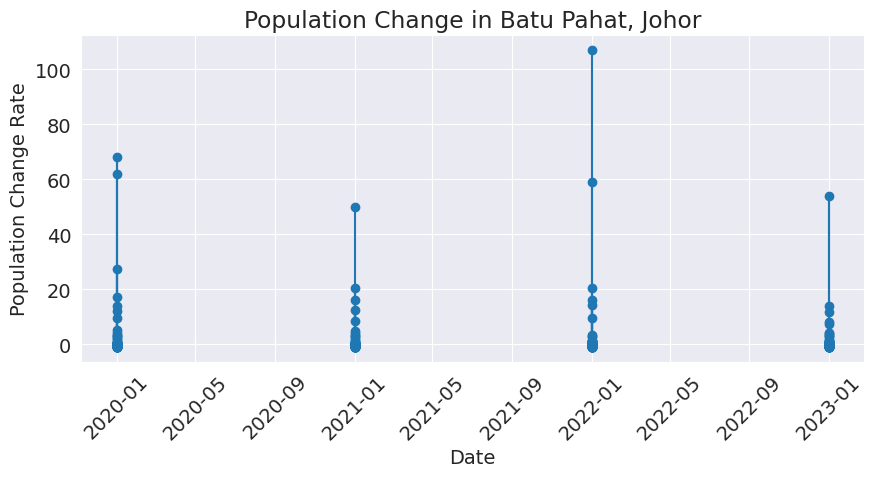

In [ ]:
plt.figure()
plt.plot(batu_pahat_data['date'], batu_pahat_data['population_change'], marker='o', linestyle='-')
plt.title('Population Change in Batu Pahat, Johor')
plt.xlabel('Date')
plt.ylabel('Population Change Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Q2: What is the age group with the highest population in each state, and how does it compare across states?

In [ ]:
state_max_population_age_group = df.groupby(['state', 'age_group'])['population'].sum().reset_index()
state_max_population_age_group = state_max_population_age_group.loc[state_max_population_age_group.groupby('state')['population'].idxmax()]

print(state_max_population_age_group)


                state    age_group  population
3               Johor  Young Adult      5743.0
7               Kedah  Young Adult      3059.3
11           Kelantan  Young Adult      2559.5
15             Melaka  Young Adult      1521.7
16    Negeri Sembilan        Adult      1656.4
20             Pahang        Adult      2188.5
24              Perak        Adult      3525.4
31             Perlis  Young Adult       444.3
32       Pulau Pinang        Adult      2674.1
39              Sabah  Young Adult      5568.8
40            Sarawak        Adult      3524.0
44           Selangor        Adult     10528.9
51         Terengganu  Young Adult      1632.7
52  W.P. Kuala Lumpur        Adult      3298.5
59        W.P. Labuan  Young Adult       133.2
60     W.P. Putrajaya        Adult       170.7


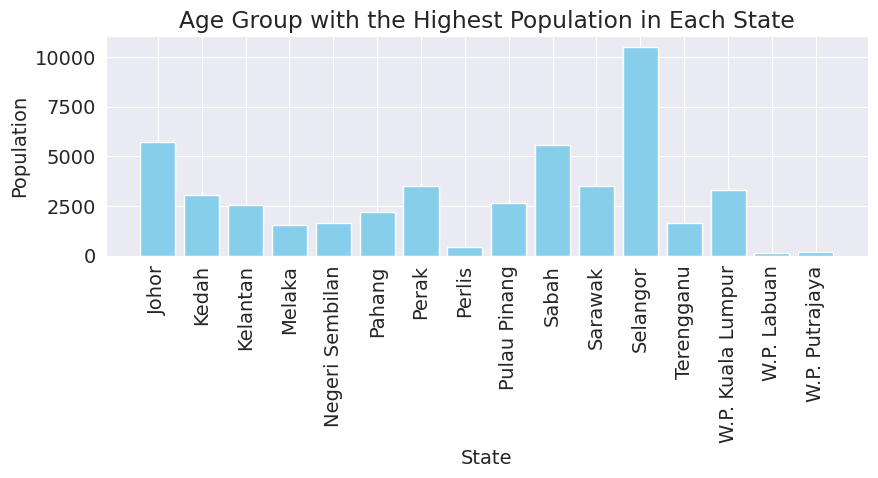

In [ ]:
plt.figure()
plt.bar(state_max_population_age_group['state'], state_max_population_age_group['population'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Age Group with the Highest Population in Each State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Q3: Is there a significant variance in population counts among different age groups within specific districts or states?

In [ ]:
age_group_variance = df.groupby(['state', 'district', 'age_group'])['population'].sum().unstack(level=[0, 1]).std()
age_group_variance

state              district         
Johor              Batu Pahat            281.545124
                   Johor Bahru           895.014573
                   Kluang                184.291174
                   Kota Tinggi           125.428688
                   Kulai                 190.161423
                                           ...     
Terengganu         Marang                 61.882308
                   Setiu                  31.017670
W.P. Kuala Lumpur  W.P. Kuala Lumpur    1210.483336
W.P. Labuan        W.P. Labuan            53.659629
W.P. Putrajaya     W.P. Putrajaya         77.492209
Length: 160, dtype: float64

#### Q4: Are there age-specific population differences among genders? For instance, does one gender dominate a particular age group in specific regions?

In [ ]:
gender_age_correlation = df[df['sex'] != 'overall_sex'].groupby(['state', 'district', 'sex', 'age'])['population'].sum()
gender_age_correlation

state           district        sex     age  
Johor           Batu Pahat      female  0-4      57.7
                                        10-14    75.5
                                        15-19    82.6
                                        20-24    87.8
                                        25-29    80.3
                                                 ... 
W.P. Putrajaya  W.P. Putrajaya  male    65-69     1.6
                                        70-74     0.7
                                        75-79     0.4
                                        80-84     0.0
                                        85+       0.0
Name: population, Length: 5760, dtype: float64

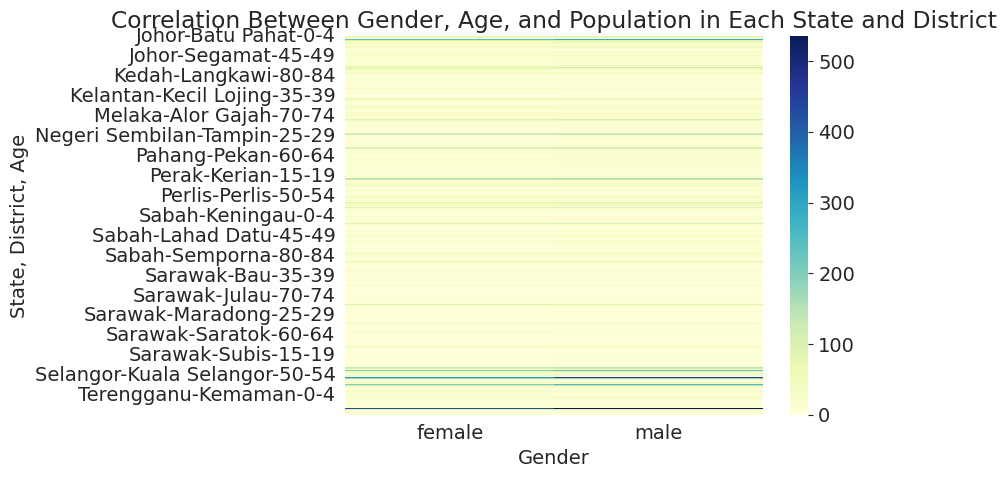

In [ ]:
gender_age_correlation = gender_age_correlation.reset_index()

heatmap_data = gender_age_correlation.pivot_table(index=['state', 'district', 'age'], columns='sex', values='population')

plt.figure()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Correlation Between Gender, Age, and Population in Each State and District')
plt.xlabel('Gender')
plt.ylabel('State, District, Age')
plt.tight_layout()
plt.show()

#### Q5: Which district has the lowest number of Indians and Chinese with the age group of 25-29

In [ ]:
indian_chinese_25_29_data = df[(df['ethnicity'].isin(['indian', 'chinese'])) & (df['age'] == '25-29')]

district_population_by_ethnicity_age = indian_chinese_25_29_data.groupby(['district', 'ethnicity', 'age'])['population'].sum()

district_population_by_ethnicity_age = district_population_by_ethnicity_age.reset_index()

pivot_table = district_population_by_ethnicity_age.pivot(index='district', columns='ethnicity', values='population')

district_with_lowest_indians = pivot_table['indian'].idxmin()
district_with_lowest_chinese = pivot_table['chinese'].idxmin()

print("The district with the lowest number of Indians in the age group 25-29 is:", district_with_lowest_indians)
print("The district with the lowest number of Chinese in the age group 25-29 is:", district_with_lowest_chinese)


The district with the lowest number of Indians in the age group 25-29 is: Asajaya
The district with the lowest number of Chinese in the age group 25-29 is: Asajaya


#### Q6: How has the population of Malaysia trended over the years, and how does this trend differ between males and females?

<Figure size 900x500 with 0 Axes>

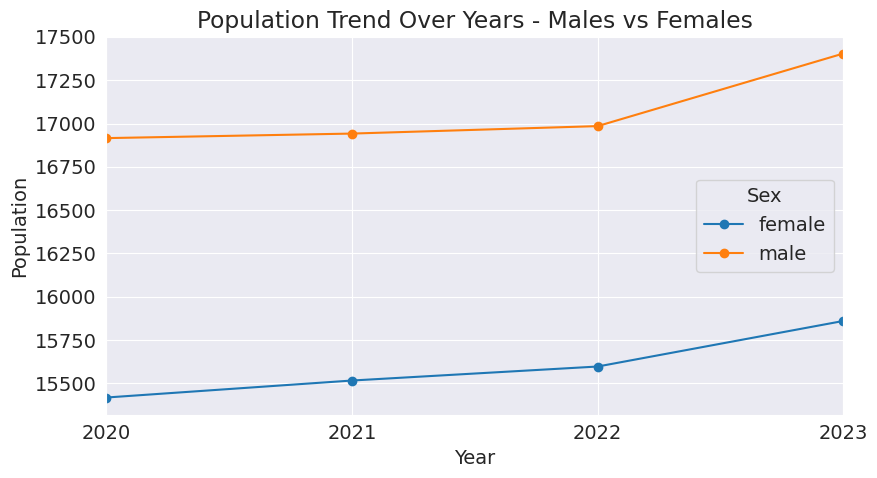

In [ ]:
population_trend = df.groupby(['date', 'sex'])['population'].sum().unstack()

plt.figure()
population_trend.plot(kind='line', marker='o')
plt.title('Population Trend Over Years - Males vs Females')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


#### Q7: How does the population change between the years 2020 and 2023 to visualize the impact of the pre and post-COVID periods using the available data

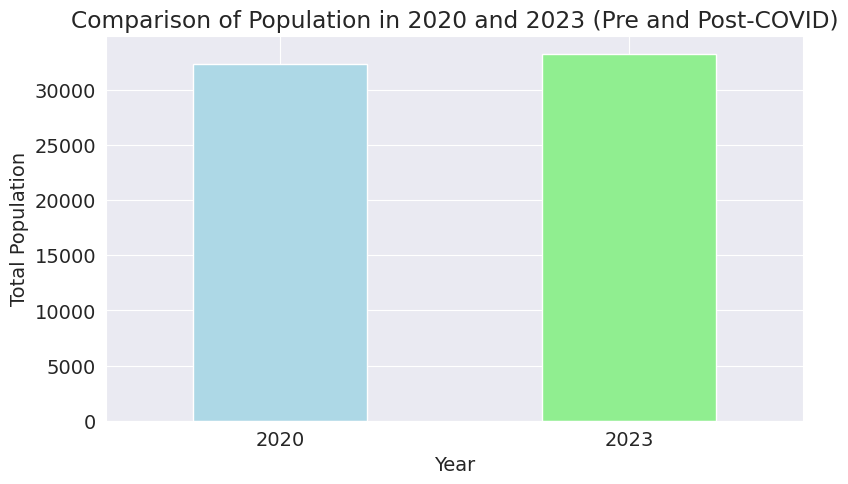

In [ ]:
df_2020_2023 = df[df['date'].dt.year.isin([2020, 2023])]

population_by_year = df_2020_2023.groupby(df_2020_2023['date'].dt.year)['population'].sum()

plt.figure()
population_by_year.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Comparison of Population in 2020 and 2023 (Pre and Post-COVID)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.xticks(rotation=0)
plt.show()

#### Q8: What is the distribution of population across different ethnic groups?

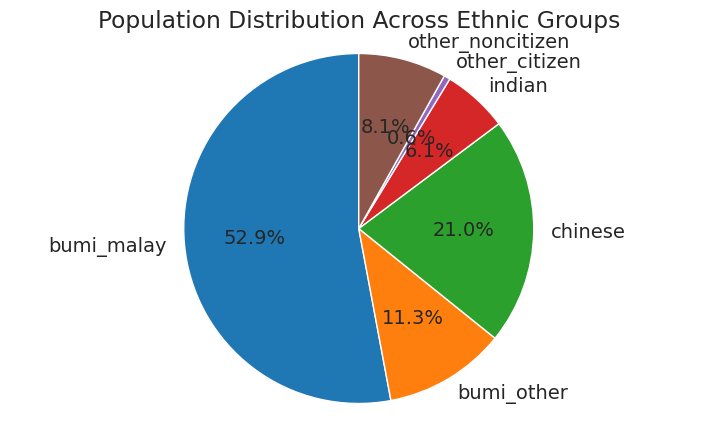

In [ ]:
population_by_ethnicity = df.groupby('ethnicity')['population'].sum()

plt.figure()
population_by_ethnicity.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Population Distribution Across Ethnic Groups')
plt.ylabel('')
plt.axis('equal')
plt.show()

#### Q9: How has the population of Malaysia changed over the years?

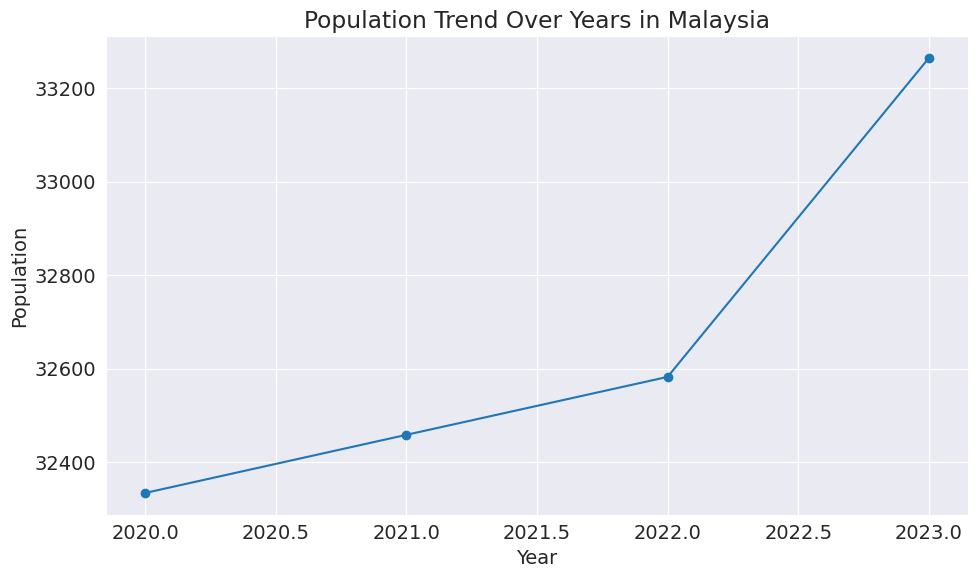

In [ ]:
population_over_time = df.groupby(df['date'].dt.year)['population'].sum()

plt.figure()
population_over_time.plot(kind='line', marker='o')
plt.title('Population Trend Over Years in Malaysia')
plt.xlabel('Year')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

#### Q10: What is the probability density and distribution of population values across the dataset for Malaysia?

<ipython-input-90-e2bfa28c266d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(population_by_date, color='blue', shade=True)


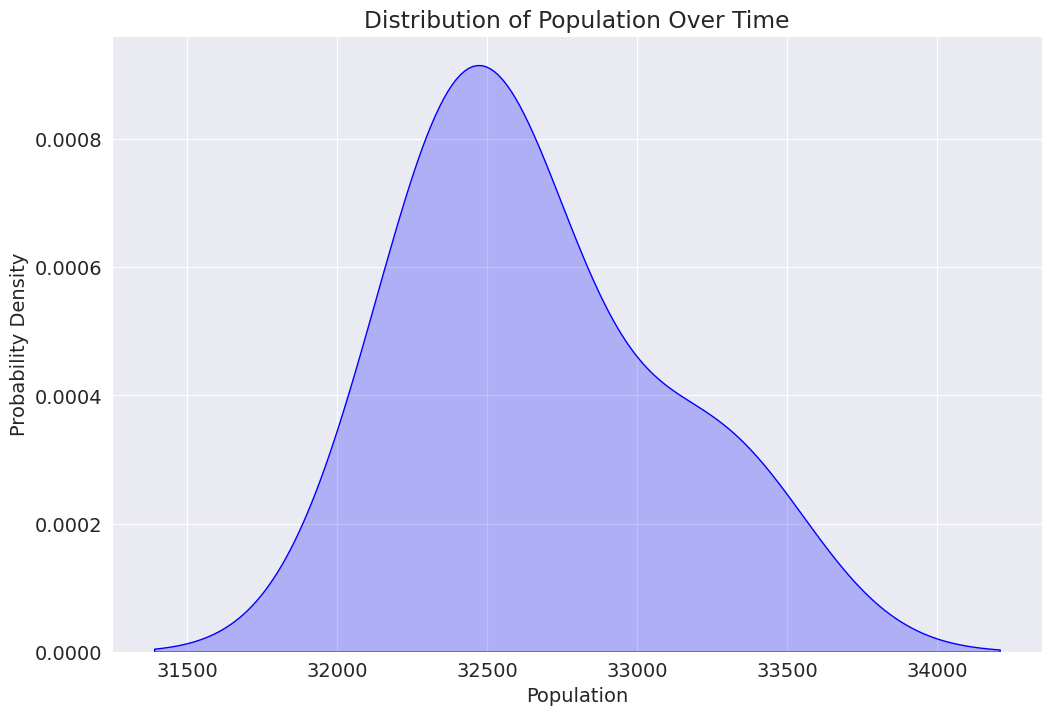

In [ ]:
population_by_date = df.groupby('date')['population'].sum()

plt.figure()
sns.kdeplot(population_by_date, color='blue', shade=True)
plt.xlabel('Population')
plt.ylabel('Probability Density')
plt.title('Distribution of Population Over Time')
plt.show()

## Inferences and Conclusion

In conclusion, this project has enabled us to conduct a comprehensive analysis, gaining valuable insights into the diverse dynamics and intricate relationships within Malaysia's population. Our exploration revealed significant variations in gender and age demographics across districts and states. These findings underscore the vast and multifaceted nature of demographic patterns, shedding light on the nuanced complexities inherent within Malaysia's population landscape.

## References and Future Work

Future project could delve deeper into the Malaysian population by integrating additional datasets, allowing for a more comprehensive analysis to unveil further intricate patterns and correlations.


> Malaysia, D. of S. (n.d.). Population Table: Administrative Districts | OpenDOSM. Open.dosm.gov.my. Retrieved November 8, 2023, from https://open.dosm.gov.my/data-catalogue/population_population_district_0

